In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 读取用户上传的 Excel 文件
file_path = 'Q1.xlsx'
data = pd.read_excel(file_path)

# 检查数据结构
data.head()


,年份,经济增长率 (%),人均GDP (元),城镇化率 (%),城镇居民人均可支配收入 (元),Cat,Dog
0,2019,6.0,70892,60.60,42359,4412,5503
1,2020,2.3,72447,63.89,43834,4862,5222
2,2021,8.1,80976,64.72,47412,5806,5429
3,2022,3.0,85698,65.22,48283,6536,5119
4,2023,5.2,89358,66.30,51821,6980,5175


In [8]:
# 设置显示中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

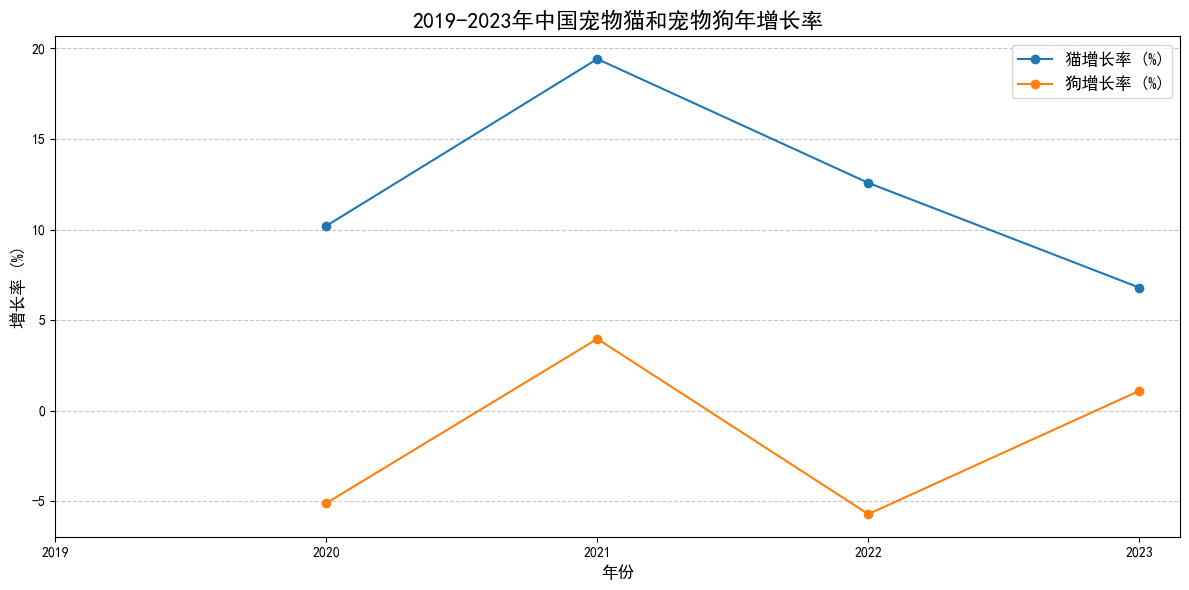

In [9]:
# 计算猫和狗的年增长率
data['Cat增长率 (%)'] = data['Cat'].pct_change() * 100
data['Dog增长率 (%)'] = data['Dog'].pct_change() * 100

# 创建增长率的可视化
plt.figure(figsize=(12, 6))
plt.plot(data['年份'], data['Cat增长率 (%)'], marker='o', label='猫增长率 (%)')
plt.plot(data['年份'], data['Dog增长率 (%)'], marker='o', label='狗增长率 (%)')

# 设置图表标题和标签
plt.title('2019-2023年中国宠物猫和宠物狗年增长率', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('增长率 (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(data['年份'])

# 显示图表
plt.tight_layout()
plt.show()


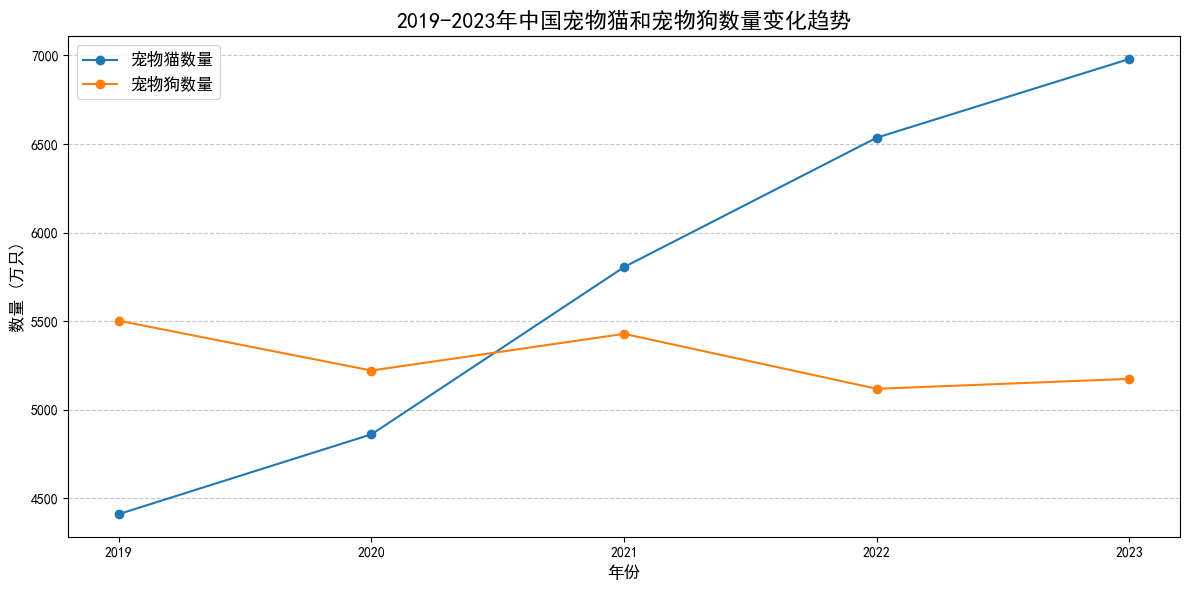

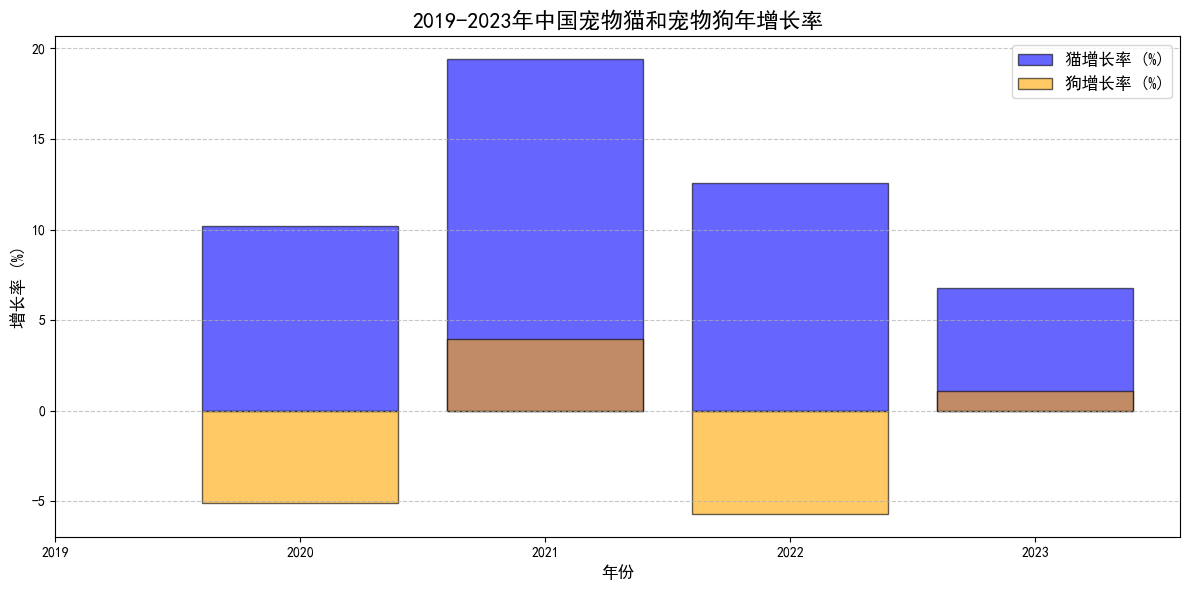

In [10]:
# 设置显示中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 创建包含猫和狗数量随时间变化的可视化
plt.figure(figsize=(12, 6))
plt.plot(data['年份'], data['Cat'], marker='o', label='宠物猫数量')
plt.plot(data['年份'], data['Dog'], marker='o', label='宠物狗数量')

# 设置图表标题和标签
plt.title('2019-2023年中国宠物猫和宠物狗数量变化趋势', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('数量 (万只)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(data['年份'])

# 显示图表
plt.tight_layout()
plt.show()

# 创建包含猫和狗年增长率的可视化
plt.figure(figsize=(12, 6))
plt.bar(data['年份'], data['Cat增长率 (%)'], alpha=0.6, label='猫增长率 (%)', color='blue', edgecolor='black')
plt.bar(data['年份'], data['Dog增长率 (%)'], alpha=0.6, label='狗增长率 (%)', color='orange', edgecolor='black')

# 设置图表标题和标签
plt.title('2019-2023年中国宠物猫和宠物狗年增长率', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('增长率 (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(data['年份'])

# 显示图表
plt.tight_layout()
plt.show()


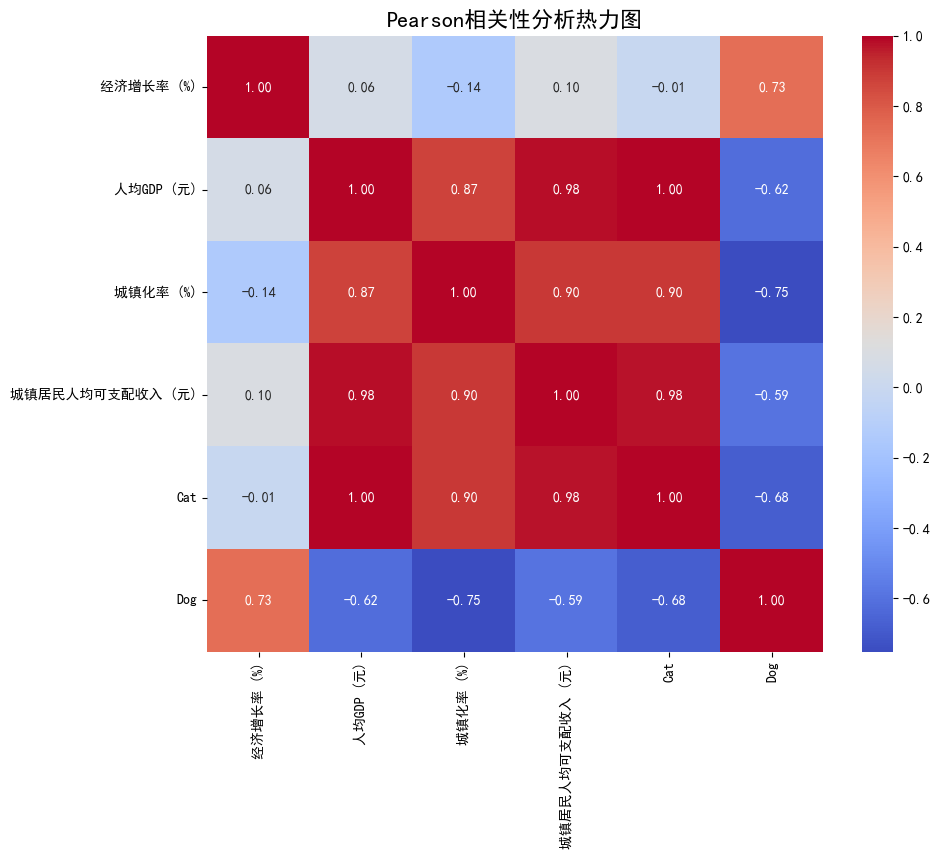

In [12]:
from scipy.stats import shapiro, spearmanr, pearsonr
import seaborn as sns

# 数据准备
variables = ['经济增长率 (%)', '人均GDP (元)', '城镇化率 (%)', '城镇居民人均可支配收入 (元)', 'Cat', 'Dog']
data_subset = data[variables]

# 正态性检验（Shapiro-Wilk检验）
normality_results = {var: shapiro(data_subset[var]) for var in variables}

# 显示正态性检验结果
normality_summary = pd.DataFrame({
    '变量': variables,
    'W值': [normality_results[var].statistic for var in variables],
    'p值': [normality_results[var].pvalue for var in variables],
    '是否正态分布': ['是' if normality_results[var].pvalue > 0.05 else '否' for var in variables]
})

# 根据正态性检验结果，选择相关性分析方法
# 如果所有变量正态分布，使用皮尔逊；否则使用斯皮尔曼
correlation_method = 'pearson' if all(normality_summary['是否正态分布'] == '是') else 'spearman'

# 计算相关性矩阵
correlation_matrix = data_subset.corr(method=correlation_method)

# 可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title(f'{correlation_method.capitalize()}相关性分析热力图', fontsize=16)
plt.show()


In [13]:
normality_summary

,变量,W值,p值,是否正态分布
0,经济增长率 (%),0.957054,0.787332,是
1,人均GDP (元),0.917409,0.513364,是
2,城镇化率 (%),0.900081,0.410332,是
3,城镇居民人均可支配收入 (元),0.963070,0.829181,是
4,Cat,0.946415,0.711568,是
5,Dog,0.896314,0.389850,是


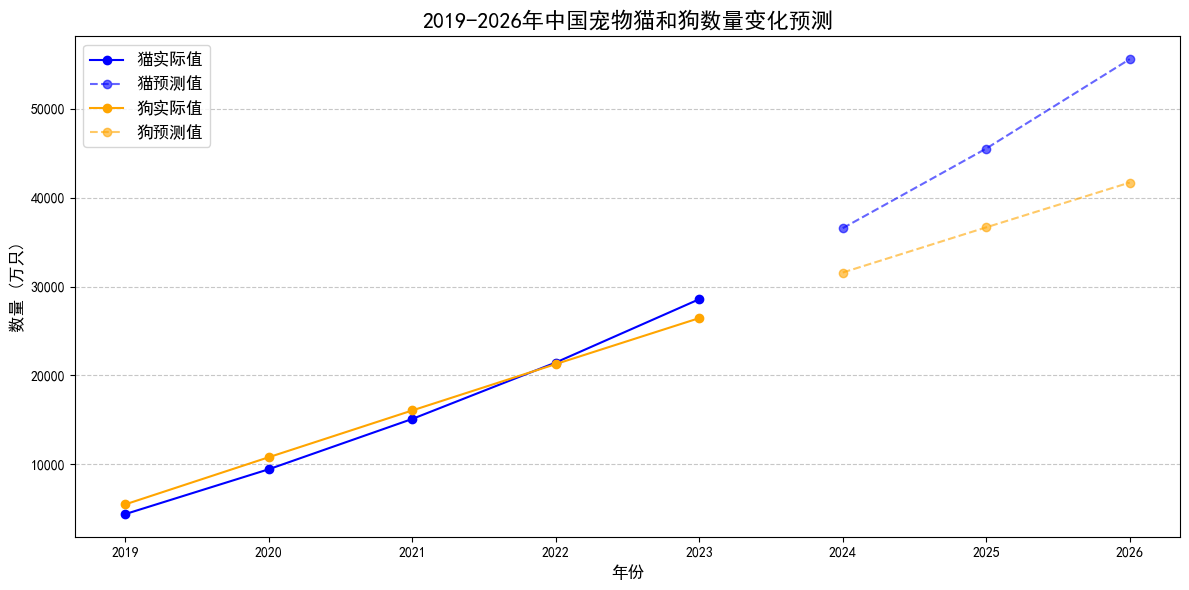

In [14]:
import numpy as np

# 数据提取
years = data['年份'].values
cat_data = data['Cat'].values
dog_data = data['Dog'].values

# 定义 GM(1,1) 模型
def gm11(x, n_pred):
    x1 = np.cumsum(x)  # 累加序列
    z1 = (x1[:-1] + x1[1:]) / 2.0  # 均值生成序列
    B = np.vstack([-z1, np.ones_like(z1)]).T
    Y = x[1:]
    u = np.linalg.inv(B.T @ B) @ B.T @ Y
    a, b = u[0], u[1]

    # 预测值生成
    def f(k):
        return (x[0] - b / a) * np.exp(-a * k) + b / a

    pred = [f(k) for k in range(len(x) + n_pred)]
    return np.array(pred[:len(x)]), np.array(pred[len(x):])

# 猫和狗的预测
n_pred = 3
cat_actual, cat_pred = gm11(cat_data, n_pred)
dog_actual, dog_pred = gm11(dog_data, n_pred)

# 未来年份
future_years = np.arange(years[-1] + 1, years[-1] + n_pred + 1)

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(years, cat_actual, marker='o', label='猫实际值', color='blue')
plt.plot(future_years, cat_pred, marker='o', linestyle='--', label='猫预测值', color='blue', alpha=0.6)
plt.plot(years, dog_actual, marker='o', label='狗实际值', color='orange')
plt.plot(future_years, dog_pred, marker='o', linestyle='--', label='狗预测值', color='orange', alpha=0.6)
plt.title('2019-2026年中国宠物猫和狗数量变化预测', fontsize=16)
plt.xlabel('年份', fontsize=12)
plt.ylabel('数量 (万只)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(list(years) + list(future_years))
plt.tight_layout()
plt.show()


https://www.mordorintelligence.com/zh-CN/industry-reports/pet-food-market-in-the-us-industry?utm_source=chatgpt.com

https://www.fortunebusinessinsights.com/zh/industry-reports/pet-food-market-100554

https://www.petslib.cn/news/637060756826750976.html

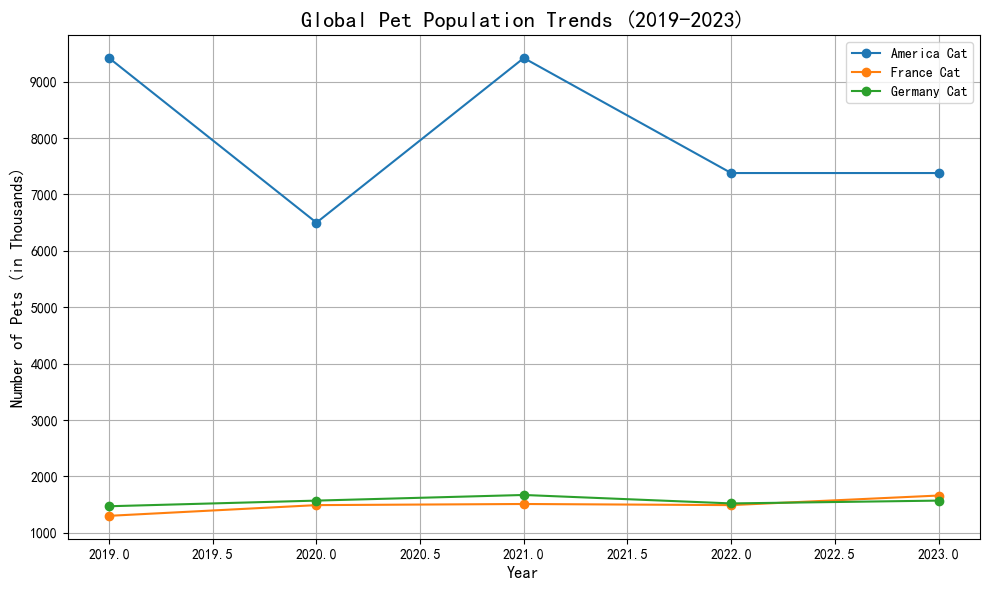

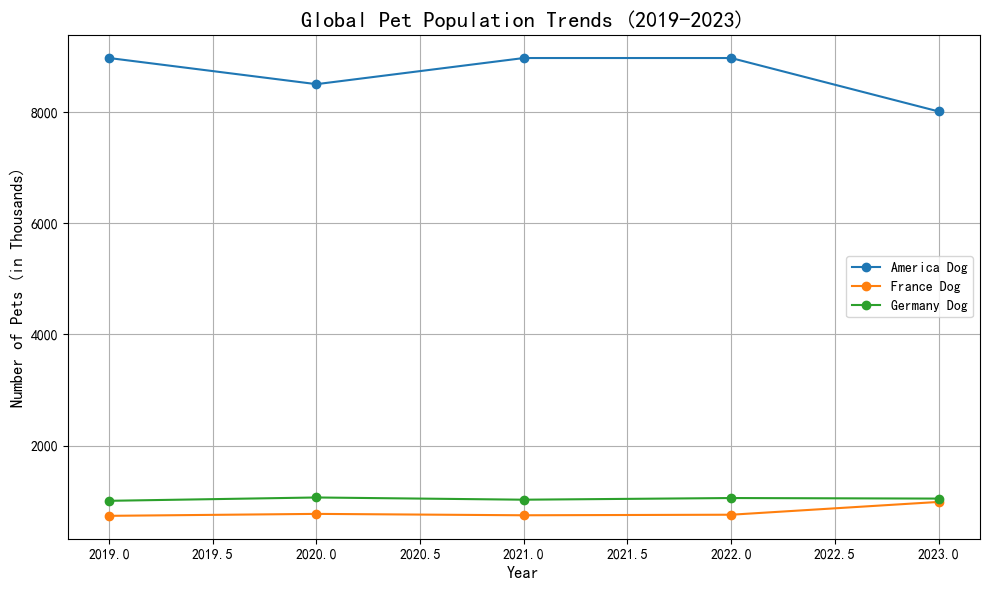

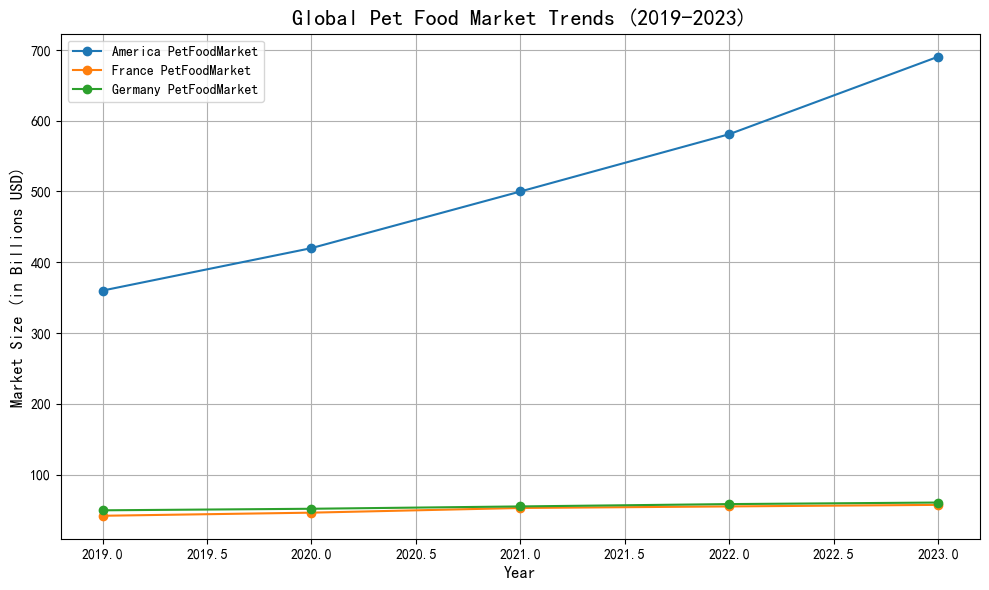

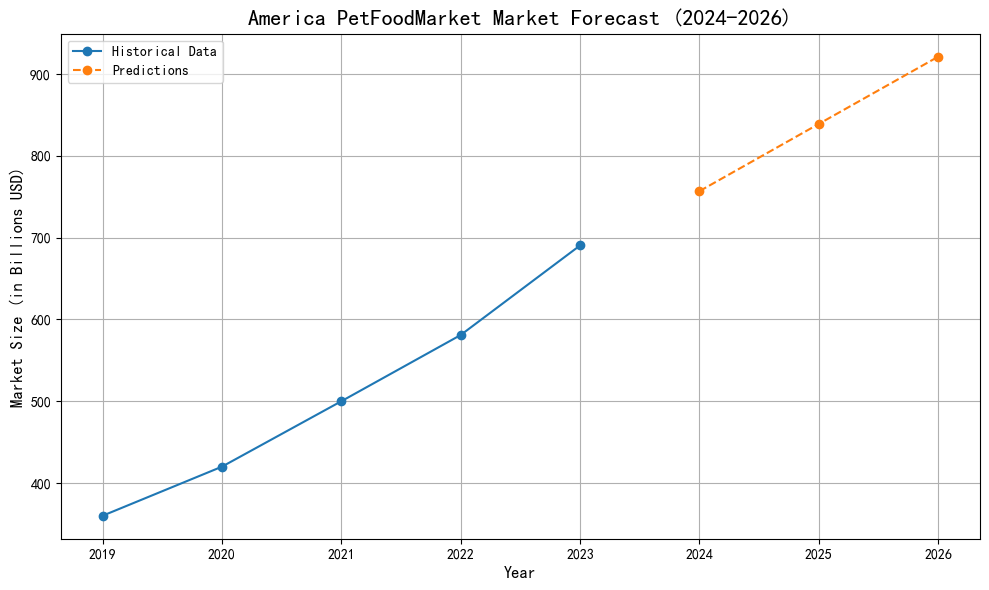

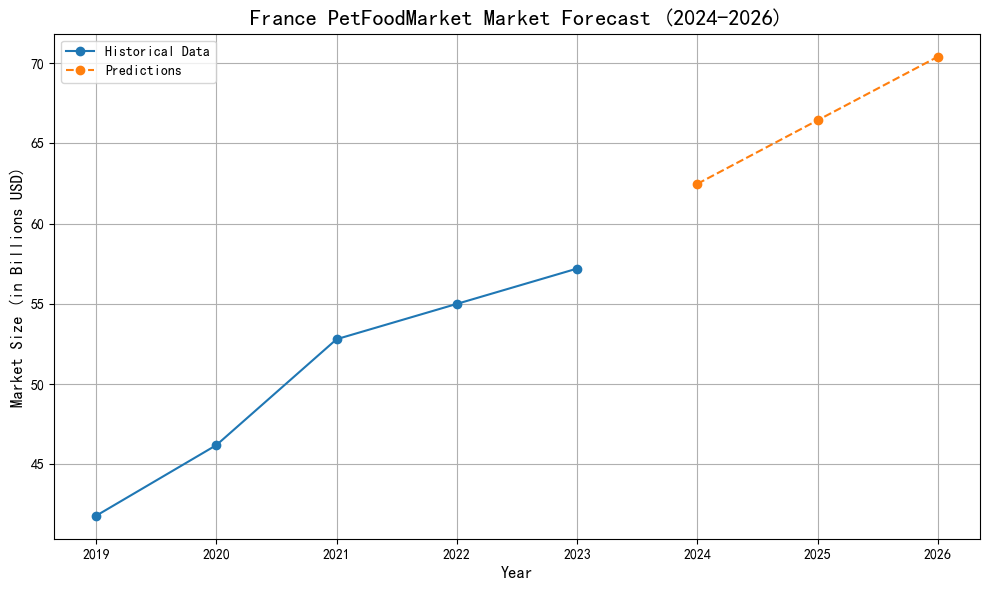

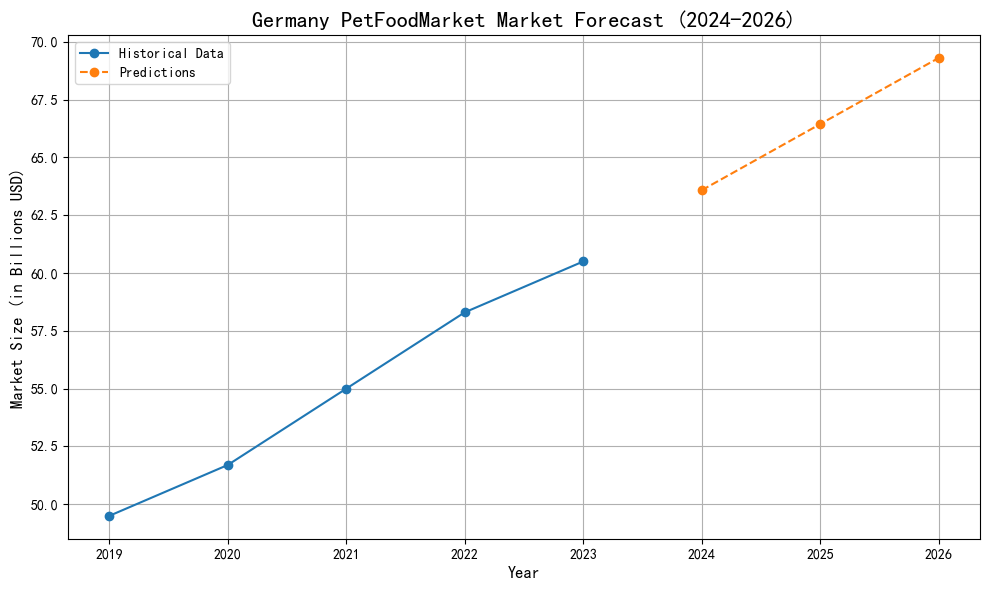

Forecast Results:
   Year  America (Billions USD)  France (Billions USD)  Germany (Billions USD)
0  2024                   756.9                  62.48                   63.58
1  2025                   839.1                  66.44                   66.44
2  2026                   921.3                  70.40                   69.30


In [32]:
# 分析全球宠物产业发展情况
def plot_trend(data, title, ylabel, pets, countries):
    plt.figure(figsize=(10, 6))
    for country in countries:
        for year in range(2019, 2024):
            column_name = f"{year}_{country}"
            if column_name in data.columns:
                plt.plot(range(2019, 2024), data.loc[data["Pets/Years"] == pets, [f"{yr}_{country}" for yr in range(2019, 2024)]].values.flatten(), 
                         marker='o', label=f"{country} {pets}")
                break
            else:
                print(f"Warning: Column '{column_name}' not found in data.")
    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# 建立预测模型
def forecast_pet_food(data, country, pets, periods=3):
    # 提取历史数据
    column_names = [f"{year}_{country}" for year in range(2019, 2024)]
    if not all(col in data.columns for col in column_names):
        raise KeyError(f"Required columns for {country}_{pets} not found in data.")
    
    values = data.loc[data["Pets/Years"] == pets, column_names].values.flatten()
    years = np.array(range(2019, 2024)).reshape(-1, 1)

    # 使用线性回归进行预测
    model = LinearRegression()
    model.fit(years, values)
    future_years = np.array(range(2024, 2024 + periods)).reshape(-1, 1)
    predictions = model.predict(future_years)

    # 结果展示
    plt.figure(figsize=(10, 6))
    plt.plot(years, values, marker='o', label="Historical Data")
    plt.plot(future_years, predictions, marker='o', linestyle='--', label="Predictions")
    plt.title(f"{country} {pets} Market Forecast (2024-{2024+periods-1})", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Market Size (in Billions USD)", fontsize=12)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # 返回预测值
    return predictions

# 可视化宠物数量趋势
plot_trend(df_pivot, "Global Pet Population Trends (2019-2023)", "Number of Pets (in Thousands)", "Cat", ["America", "France", "Germany"])
plot_trend(df_pivot, "Global Pet Population Trends (2019-2023)", "Number of Pets (in Thousands)", "Dog", ["America", "France", "Germany"])

# 可视化宠物食品市场规模趋势
plot_trend(df_pivot, "Global Pet Food Market Trends (2019-2023)", "Market Size (in Billions USD)", "PetFoodMarket", ["America", "France", "Germany"])

# 预测未来三年宠物食品市场需求量
forecast_america = forecast_pet_food(df_pivot, "America", "PetFoodMarket")
forecast_france = forecast_pet_food(df_pivot, "France", "PetFoodMarket")
forecast_germany = forecast_pet_food(df_pivot, "Germany", "PetFoodMarket")

# 汇总预测结果
future_years = range(2024, 2027)
forecast_df = pd.DataFrame({
    "Year": future_years,
    "America (Billions USD)": forecast_america,
    "France (Billions USD)": forecast_france,
    "Germany (Billions USD)": forecast_germany
})

# 打印预测结果
print("Forecast Results:")
print(forecast_df)

# 保存结果为 Excel 文件
forecast_df.to_excel("Global_Pet_Food_Forecast.xlsx", index=False)


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 读取数据
file_path = 'Q2.xlsx'
data = pd.read_excel(file_path)

# 查看数据结构
data.head()


,Countries,Pets/Years,2023,2022,2021,2020,2019
0,America,Cat,7380.0,7380.0,9420.0,6500.0,9420.0
1,NaN,Dog,8010.0,8970.0,8970.0,8500.0,8970.0
2,NaN,宠物食品市场,690.5,581.0,500.0,420.0,360.0
3,NaN,城镇化%,83.0,82.9,82.8,82.7,82.5
4,NaN,经济增长率（%）,1.9,2.1,5.7,-3.4,2.3


Fitted model parameters: a = 808.20, b = -33.9599


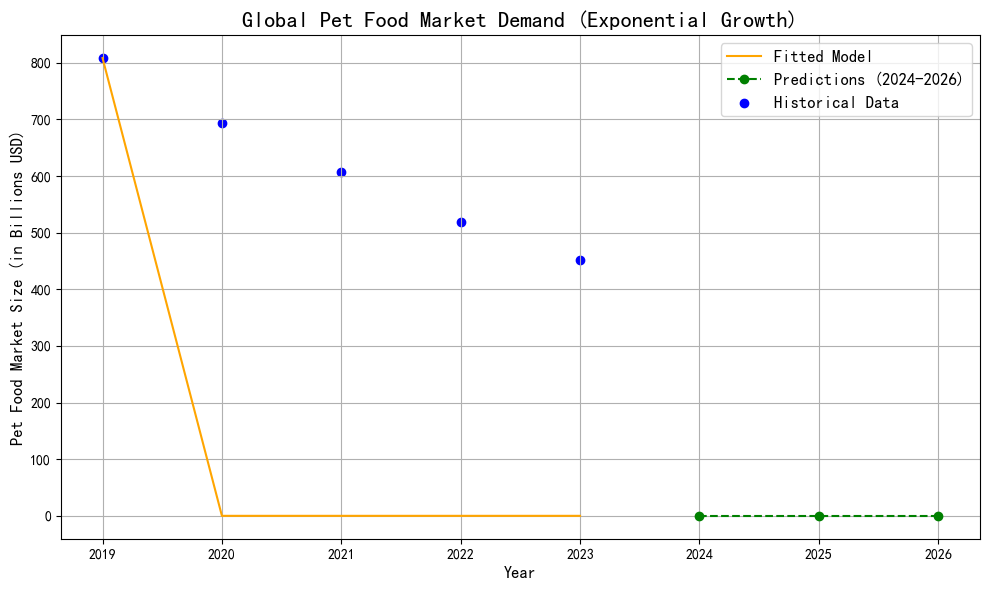

   Year  Predicted_Market_Size
0  2024           1.460681e-71
1  2025           2.605930e-86
2  2026          4.649113e-101


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 构造数据
data = {
    "Countries": ["America", "America", "America", "America", "America", "America", 
                  "France", "France", "France", "France", "France", "France", 
                  "Germany", "Germany", "Germany", "Germany", "Germany", "Germany"],
    "Pets/Years": ["Cat", "Dog", "宠物食品市场", "城镇化%", "人均收入（美元）", "经济增长率（%）"] * 3,
    "2023": [7380, 8010, 690.5, 83, 70000, 1.9, 1660, 990, 57.2, 81.4, 45000, 1.5, 
             1570, 1050, 60.5, 77.8, 51000, 1.2],
    "2022": [7380, 8970, 581, 82.9, 68000, 2.1, 1490, 760, 55, 81.2, 44000, 2.6, 
             1520, 1060, 58.3, 77.7, 50000, 1.8],
    "2021": [9420, 8970, 500, 82.8, 66000, 5.7, 1510, 750, 52.8, 81, 43000, 7, 
             1670, 1030, 55, 77.6, 49000, 2.9],
    "2020": [6500, 8500, 420, 82.7, 65000, -3.4, 1490, 775, 46.2, 80.8, 41000, -8, 
             1570, 1070, 51.7, 77.5, 47000, -4.9],
    "2019": [9420, 8970, 360, 82.5, 63000, 2.3, 1300, 740, 41.8, 80.4, 42000, 1.5, 
             1470, 1010, 49.5, 77.3, 48000, 0.6]
}

# 创建DataFrame
df = pd.DataFrame(data)

# 提取全球宠物食品市场数据
food_market_data = df[df['Pets/Years'] == '宠物食品市场'][['2023', '2022', '2021', '2020', '2019']].astype(float)
food_market_values = food_market_data.sum(axis=0).values  # 全球总和

# 定义年份偏移
years = np.array(range(2019, 2024)) - 2019

# 指数增长模型
def exponential_growth(x, a, b):
    return a * np.exp(b * x)

# 拟合指数增长模型
params, covariance = curve_fit(exponential_growth, years, food_market_values)

# 输出拟合参数
a, b = params
print(f"Fitted model parameters: a = {a:.2f}, b = {b:.4f}")

# 预测未来三年
future_years = np.array([2024, 2025, 2026]) - 2019
future_predictions = exponential_growth(future_years, a, b)

# 可视化历史数据与预测结果
plt.figure(figsize=(10, 6))
plt.scatter(years + 2019, food_market_values, color='blue', label='Historical Data')
plt.plot(years + 2019, exponential_growth(years, a, b), label='Fitted Model', color='orange')
plt.plot(future_years + 2019, future_predictions, 'o--', label='Predictions (2024-2026)', color='green')
plt.title("Global Pet Food Market Demand (Exponential Growth)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Pet Food Market Size (in Billions USD)", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

# 汇总预测结果
future_results = pd.DataFrame({
    "Year": future_years + 2019,
    "Predicted_Market_Size": future_predictions
})

# 显示结果
print(future_results)

# 保存预测结果为Excel
future_results.to_excel("Future_Pet_Food_Market_Predictions_Exponential.xlsx", index=False)



Fitted model: y = 180525.32 + -89.02 * x


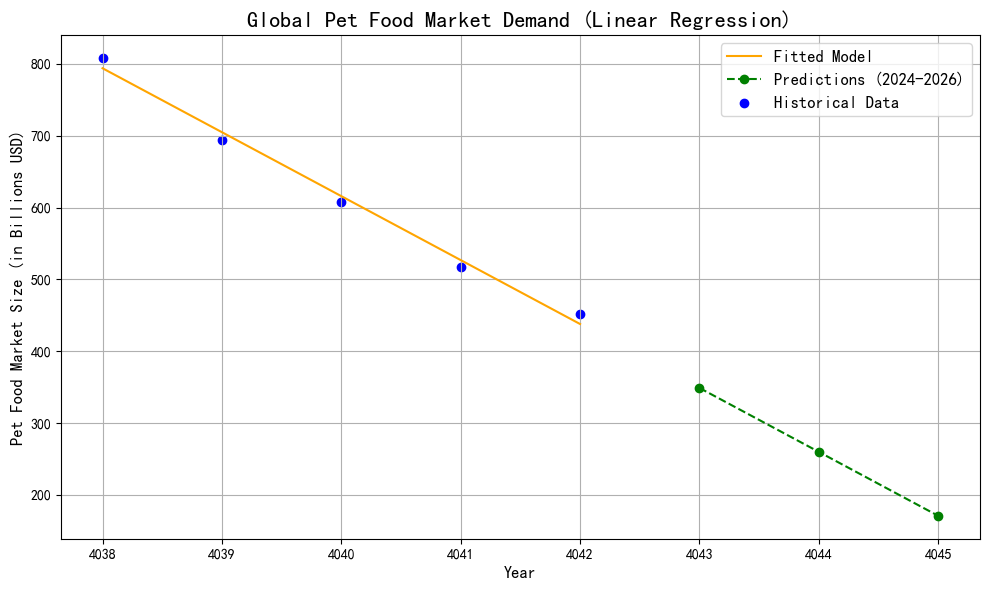

   Year  Predicted_Market_Size
0  4043                 348.84
1  4044                 259.82
2  4045                 170.80


In [42]:
from sklearn.linear_model import LinearRegression

# 定义年份偏移
years = np.array(range(2019, 2024)).reshape(-1, 1)  # 作为特征 (X)
food_market_values = food_market_values.reshape(-1, 1)  # 作为目标值 (y)

# 线性回归模型
linear_model = LinearRegression()
linear_model.fit(years, food_market_values)

# 输出模型参数
intercept = linear_model.intercept_[0]
slope = linear_model.coef_[0][0]
print(f"Fitted model: y = {intercept:.2f} + {slope:.2f} * x")

# 预测未来三年
future_years = np.array([2024, 2025, 2026]).reshape(-1, 1)
future_predictions = linear_model.predict(future_years).flatten()

# 可视化历史数据与预测结果
plt.figure(figsize=(10, 6))
plt.scatter(years + 2019, food_market_values, color='blue', label='Historical Data')
plt.plot(years + 2019, linear_model.predict(years), label='Fitted Model', color='orange')
plt.plot(future_years + 2019, future_predictions, 'o--', label='Predictions (2024-2026)', color='green')
plt.title("Global Pet Food Market Demand (Linear Regression)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Pet Food Market Size (in Billions USD)", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

# 汇总预测结果
future_results_linear = pd.DataFrame({
    "Year": future_years.flatten() + 2019,
    "Predicted_Market_Size": future_predictions
})

# 显示结果
print(future_results_linear)

# 保存预测结果为Excel
future_results_linear.to_excel("Future_Pet_Food_Market_Predictions_Linear.xlsx", index=False)

